# Linear Regression

In this notebook I'll work through some examples using linear regression. I'll start my making a small dataset & then building up the algorithm from scratch.

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression

In [2]:
# generate data
X,y,coef = make_regression(n_samples=200, 
                           n_features=1, 
                           n_informative=1, 
                           n_targets=1, 
                           bias=50, 
                           noise=15,
                           coef=True, 
                           random_state=42)

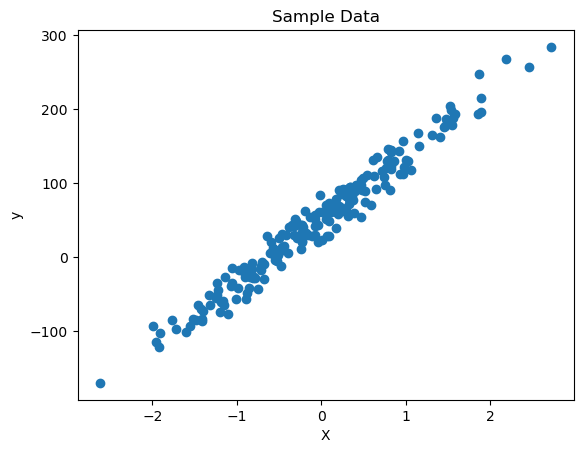

In [3]:
# plot our data
plt.scatter(X,y)
plt.title('Sample Data')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [4]:
class LR(object):
    """
    Build a class to encompass linear regression with least squares estimation
    """
    
    def __init__(self) -> None:
        """
        Initialiser
        """
        # private parameters array
        self.__B = np.array([])
        
    def train(self, Xin: np.array, Yin: np.array) -> None:
        """
        Train function
        
        Inputs:
            Xin -> array of training predictor features
            Yin -> array of training labels
        """
        # add column of 1's to independent variables
        X        = np.ones((Xin.shape[0],Xin.shape[1]+1))
        X[:,1:]  = Xin
        # calculate the model parameters using least squares estimation
        Xfactors = np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),np.transpose(X))
        self.__B   = np.matmul(Xfactors,Yin)
        
    def predict(self, Xin: np.array) -> np.array:
        """
        Predict function
        
        Inputs:
            Xin -> array of predictor features
            
        Outputs:
            Yp -> model predictions
        """
        # add column of 1's to independent variables
        X       = np.ones((Xin.shape[0],Xin.shape[1]+1))
        X[:,1:] = Xin
        # calculate predictions
        Yp      = np.matmul(X,self.__B)
        # return predictions
        return(Yp)
    
    def return_B(self) -> np.array:
        """
        Return model parameters
        
        Outputs:
            Array of learned model parameters
        """
        return(self.__B)

Declare a Linear Regression instance, train it, and then generate predictions on the training data. 

In [5]:
# declare a LR object
lr = LR()
# fit the model
lr.train(X,y)
# make predictions
ypred = lr.predict(X)

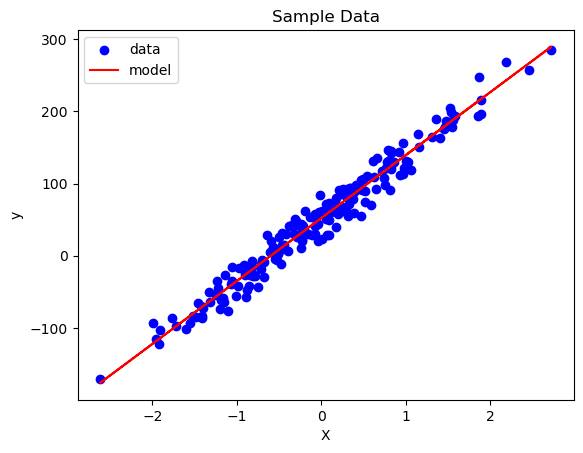

In [6]:
# plot our data + fitted results
plt.scatter(X,y,c='b')
plt.plot(X,ypred,c='r')
plt.title('Sample Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(['data','model'],loc=2)
plt.show()

In [7]:
# what is our R2 score?
r2_score(y,ypred)

0.9662908496470797

In [8]:
# view our learned model parameters
lr.return_B()

array([52.14277085, 87.1809762 ])

In [9]:
# what is the true model coefficient?
coef

array(87.73730719)

Instead of making a linear regression algorithm from scratch, we can use the API provided by scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [10]:
# imports
from sklearn.linear_model import LinearRegression

In [11]:
# declare a LinearRegression object
lr = LinearRegression()
# fit the model
lr.fit(X,y)
# make predictions
ypred = lr.predict(X)

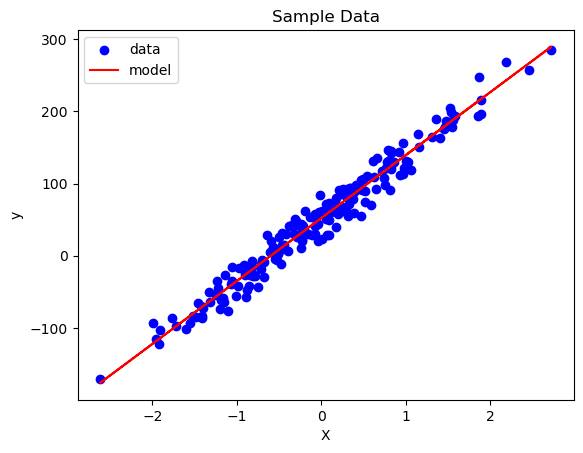

In [12]:
# plot our data + fitted results
plt.scatter(X,y,c='b')
plt.plot(X,ypred,c='r')
plt.title('Sample Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(['data','model'],loc=2)
plt.show()

In [13]:
# what is our R2 score?
lr.score(X,y)

0.9662908496470797

In [14]:
# view our model parameters
print(lr.intercept_)
print(lr.coef_)

52.142770851531786
[87.1809762]
